# Prep the Env

In [ ]:
from google.colab import drive

drive.mount("/content/drive")


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [329]:
path = "/content/drive/MyDrive/Success of AI Writers/github/success-of-ai-writers/notebooks/test_scores"

# Boxplot Visulation

In [ ]:
def boxplot(model_name,dataframe):
  labels = ["Title","Abstract","Introduction"]
  fig, ax = plt.subplots(figsize=(10, 6))
  # rectangular box plot
  bplot = ax.boxplot(dataframe.values,
                      vert=False,  # vertical box alignment
                      patch_artist=True,  # fill with color
                      labels=labels)  # will be used to label x-ticks
  ax.set_title(f'{model_name} Accuracy Percentages on Paraphrased Articles')

  plt.yticks(rotation=45)

  # fill with colors
  colors = ['pink', 'lightblue', 'lightgreen']

  for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

  # adding horizontal grid lines
  for ax in [ax]:
      ax.yaxis.grid(True)
      """ax.set_xlabel('Three separate samples')
      ax.set_ylabel('Observed values')"""

  plt.show()

# BERT

In [330]:
df_bert = pd.read_csv(path+"/bert_article_results.csv",index_col=0)

In [331]:
df_bert.describe()

,title_similarities,abstract_similarities,introduction_similarities
count,69.000000,69.000000,69.000000
mean,73.329979,81.873768,64.068325
std,34.290082,15.720880,24.005191
min,0.000000,32.349232,3.405745
25%,81.445032,74.880796,50.091154
50%,88.322538,88.633073,69.151846
75%,92.062235,93.034645,81.376230
max,98.001021,96.117757,95.064051


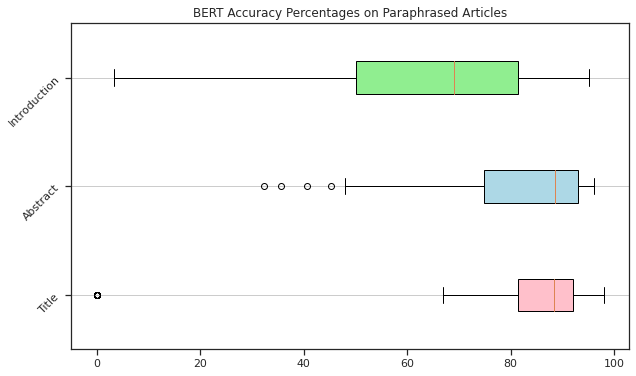

In [332]:
boxplot("BERT",df_bert)

# RoBERTa

In [333]:
df_roberta = pd.read_csv(path+"/roberta_article_results.csv",index_col=0)

In [334]:
df_roberta.describe()

,title_similarities,abstract_similarities,introduction_similarities
count,69.000000,69.000000,69.000000
mean,77.868001,75.962958,57.745605
std,32.949572,18.479334,23.532109
min,0.000000,26.055097,3.207908
25%,85.108280,65.781202,40.724634
50%,92.418587,79.320188,66.117876
75%,94.518346,92.585230,74.626091
max,98.119801,99.117364,97.178723


In [335]:
df_roberta

,title_similarities,abstract_similarities,introduction_similarities
0,83.984745,69.795027,51.203815
1,94.039160,96.754689,18.534889
2,92.739677,93.603786,68.213837
3,0.000000,61.524811,58.740608
4,89.592344,35.101503,28.679468
...,...,...,...
64,0.000000,82.151772,73.019996
65,90.964508,51.569814,40.024427
66,90.275550,56.793283,11.071163
67,56.367987,45.688182,71.423889


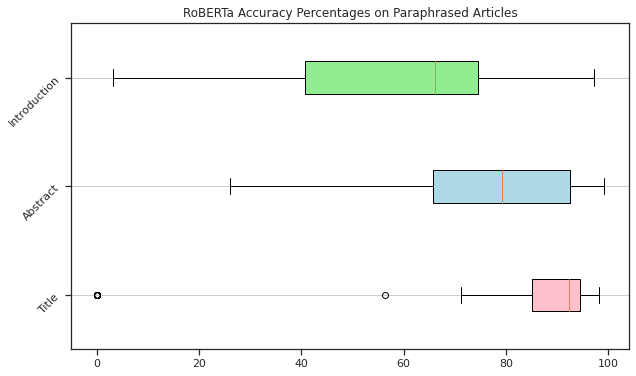

In [336]:
boxplot("RoBERTa",df_roberta)

# DeBERTa

In [337]:
df_deberta = pd.read_csv(path+"/deberta_article_results.csv",index_col=0)

In [338]:
df_deberta.describe()

,title_similarities,abstract_similarities,introduction_similarities
count,69.000000,69.000000,69.000000
mean,74.654463,66.458053,38.579295
std,33.262958,24.025094,20.807662
min,0.000000,13.909618,2.325050
25%,80.751044,47.568111,23.135778
50%,88.846809,69.050986,40.501897
75%,92.804652,91.136341,49.619766
max,98.332661,98.416167,97.581412


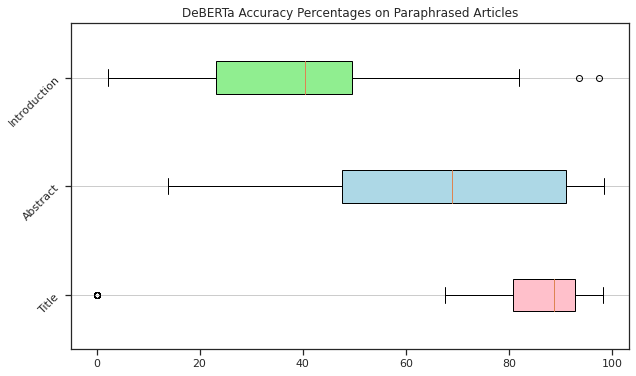

In [339]:
boxplot("DeBERTa",df_deberta)

# AlBERT

In [340]:
df_albert = pd.read_csv(path+"/albert_article_results.csv",index_col=0)

In [341]:
df_albert.describe()

,title_similarities,abstract_similarities,introduction_similarities
count,69.000000,69.000000,69.000000
mean,62.692088,71.510846,53.396628
std,36.107375,16.743565,22.800862
min,0.000000,18.932027,4.750527
25%,53.640455,61.815298,38.538660
50%,76.703078,77.508845,54.973967
75%,88.425750,83.271364,72.320791
max,96.987456,91.817994,87.816428


In [342]:
df_albert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title_similarities         69 non-null     float64
 1   abstract_similarities      69 non-null     float64
 2   introduction_similarities  69 non-null     float64
dtypes: float64(3)
memory usage: 2.2 KB


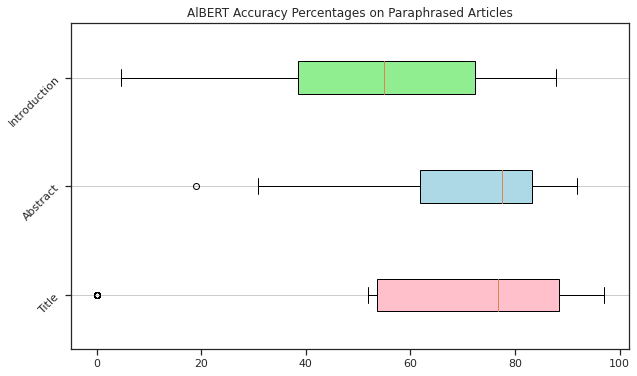

In [343]:
boxplot("AlBERT",df_albert)

# Scatter Visulation

In [ ]:
#take column name and all other data
def scatter(column_name,albert,bert,roberta,deberta):
  plt.figure(figsize=(14,8))
  plt.scatter(list(albert.index), np.log10(albert[column_name]), c ="blue",
              linewidths = 2,
              
              )
  
  plt.scatter(list(bert.index), np.log10(bert[column_name]), c ="green",
              linewidths = 2,
            
              )
  
  plt.scatter(list(roberta.index), np.log10(roberta[column_name]), c ="red",
              linewidths = 2,
            
              )
  
  plt.scatter(list(deberta.index), np.log10(deberta[column_name]), c ="yellow",
              linewidths = 2,
            
              )
  name=column_name.split("_")[0]

  plt.xlabel("Index")
  plt.ylabel(f"Log10 Similarity {name.capitalize()}")
  plt.show()

# Barplot Visulation

In [4]:
df = pd.DataFrame({'Article Section': ["Title","Abstract","Introduction"],
                   'BERT': [73.3,81.8,64.1],
                   "RoBERTa": [77.8,75.9,57.7],
                   'DeBERTa': [74.6,66.4,38.5],
                   'AlBERT': [62.6,71.5,53.3]}
                  )


(0.0, 100.0)

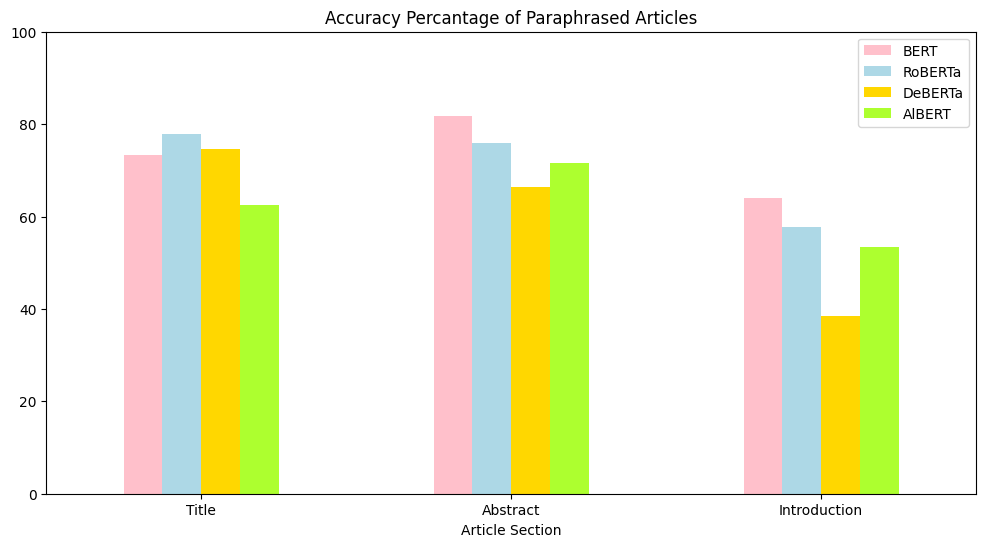

In [5]:

#plot columns on bar chart
df[['Article Section', 'BERT', 'RoBERTa', 'DeBERTa',"AlBERT"]].plot(x='Article Section', 
                                                                     kind='bar', 
                                                                     title="Accuracy Percantage of Paraphrased Articles",
                                                                     figsize=(12,6),
                                                                     color=['pink', 'lightblue', 'gold',"greenyellow"])
plt.xticks(rotation=0);
plt.ylim([0,100])

/tmp/ipykernel_9651/2070232376.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


(0.0, 100.0)

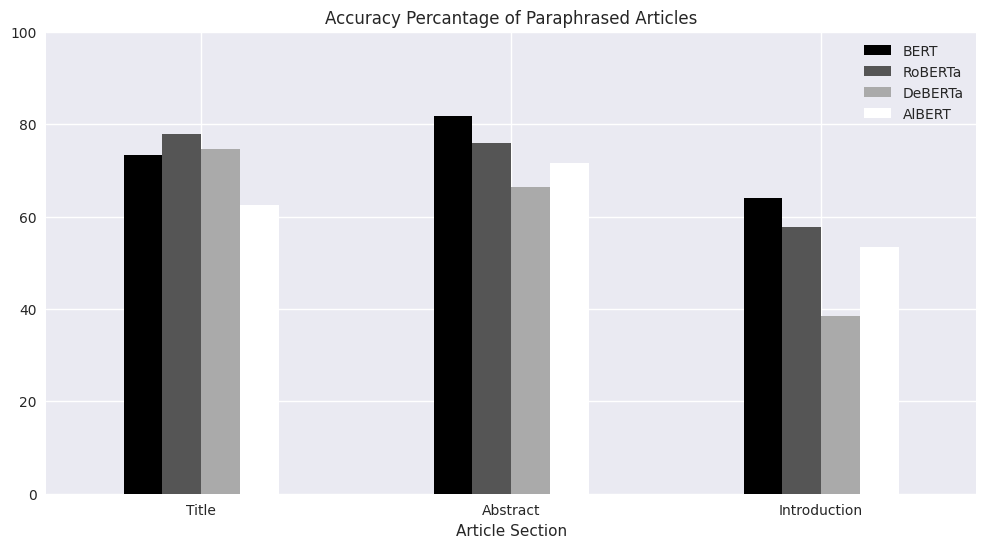

In [6]:

#plot columns on bar chart
plt.style.use('seaborn')
df[['Article Section', 'BERT', 'RoBERTa', 'DeBERTa',"AlBERT"]].plot(x='Article Section', 
                                                                     kind='bar', 
                                                                     title="Accuracy Percantage of Paraphrased Articles",
                                                                     figsize=(12,6),
                                                                     colormap=plt.cm.gray
                                                                    )
plt.xticks(rotation=0);
plt.ylim([0,100])